In [4]:
# Nguyễn Thị Hồng Thi

This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:

Gender: Gender of the borrower (including two values 'F' and 'M')
Age: Age of the customer applying for a loan (including positive integer values)
Income (USD): Customer's income in USD (value is a positive number)
Income Stability: The level of customer's income stability (including three values of Low and High)
Property Age: Life expectancy of the house in days (including positive integer values)
Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
Property Price: The value of the house in USD (including positive real values)
Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import time

# Prepare and Analyze data

## Load data

In [3]:
# Load file
def read_dataset(path):
    df=pd.read_csv(path)
    display(df.shape)
    display(df.head())
    display(df.tail())
    display(df.describe())
    return df

In [4]:
df = read_dataset("final_house_loan.csv")

(47297, 8)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.42075
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.18337
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.64800
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.71090
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.91934


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
47292,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47293,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293360
47294,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861500
47295,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596760
47296,F,46,492.91,Low,497.91,Rural,24597.61,5941.989388


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586579
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822160
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132400
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236900
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165200


## Data analysis

<AxesSubplot:>

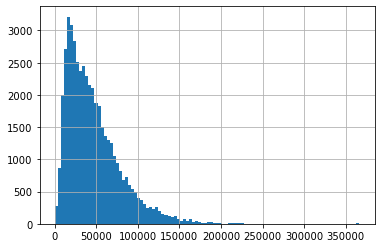

In [5]:
df["Loan Sanction Amount (USD)"].hist(bins=100)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

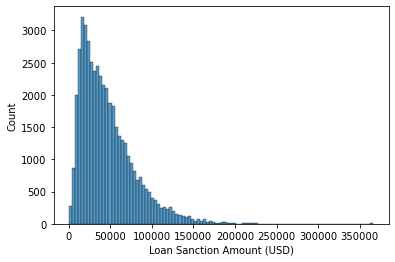

In [6]:
import seaborn as sns
sns.histplot(x = "Loan Sanction Amount (USD)", data = df, bins = 100)

In [7]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [7]:
len(df)

47297

## Preprocessing

In [8]:
# Drop Null datapoint
def processing_data(df):
    print('Sample size:', len(df))
    df = df.dropna()
    print('Not null sample size:', len(df))
    return df


In [9]:
df=processing_data(df.copy())

Sample size: 47297
Not null sample size: 47251


## Feature engineering

In [10]:
# Normalize data
# Method 1
start_time = time.time()
normalized_data = df.copy()
normalized_data['Gender'] = normalized_data['Gender'].apply(lambda x: 0 if x=='M' else 1)
normalized_data['Income Stability'] = normalized_data['Income Stability'].apply(lambda x: 0 if x=='Low' else 1)
normalized_data['Property Location']= normalized_data['Property Location'].apply(lambda x: 0 if x=='Rural' else 1 if x=='Urban' else 2)

display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,0,1651.25,0,59641.82,21026.42075
1,0,29,1989.71,0,1990.71,1,179858.51,60595.18337
2,1,37,1849.91,0,1856.91,0,117297.62,39181.64800
3,0,65,2735.18,1,2747.18,0,354417.72,128497.71090
4,1,62,4741.78,1,4740.78,1,82049.80,39386.91934


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.007706,0.002445,-0.019000,0.002512,-0.006358,-0.005931,-0.003396
Age,-0.007706,1.000000,-0.044086,0.455855,-0.044085,0.006048,-0.003274,-0.000115
Income (USD),0.002445,-0.044086,1.000000,-0.080961,0.999986,0.004057,0.358110,0.392897
Income Stability,-0.019000,0.455855,-0.080961,1.000000,-0.081008,0.008056,-0.004813,0.070969
Property Age,0.002512,-0.044085,0.999986,-0.081008,1.000000,0.004050,0.358110,0.392892
Property Location,-0.006358,0.006048,0.004057,0.008056,0.004050,1.000000,-0.001008,-0.003714
Property Price,-0.005931,-0.003274,0.358110,-0.004813,0.358110,-0.001008,1.000000,0.994429
Loan Sanction Amount (USD),-0.003396,-0.000115,0.392897,0.070969,0.392892,-0.003714,0.994429,1.000000


Running time 0.14799976348876953


In [11]:
# Method 2
start_time = time.time()
normalized_data = pd.get_dummies(df.loc[:, ['Gender', 'Income Stability', 'Property Location']])
normalized_data = pd.concat([normalized_data, df.loc[:,['Age', 'Income (USD)', 'Property Age', 'Property Price']]], axis=1)
normalized_data = pd.concat([normalized_data, df.loc[:,['Loan Sanction Amount (USD)']]], axis=1)

display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,1,0,0,1,1,0,0,19,1641.25,1651.25,59641.82,21026.42075
1,0,1,0,1,0,0,1,29,1989.71,1990.71,179858.51,60595.18337
2,1,0,0,1,1,0,0,37,1849.91,1856.91,117297.62,39181.64800
3,0,1,1,0,1,0,0,65,2735.18,2747.18,354417.72,128497.71090
4,1,0,1,0,0,0,1,62,4741.78,4740.78,82049.80,39386.91934


,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
Gender_F,1.000000,-1.000000,-0.019000,0.019000,0.008915,-0.002188,-0.006825,-0.007706,0.002445,0.002512,-0.005931,-0.003396
Gender_M,-1.000000,1.000000,0.019000,-0.019000,-0.008915,0.002188,0.006825,0.007706,-0.002445,-0.002512,0.005931,0.003396
Income Stability_High,-0.019000,0.019000,1.000000,-1.000000,-0.005812,0.008223,-0.002504,0.455855,-0.080961,-0.081008,-0.004813,0.070969
Income Stability_Low,0.019000,-0.019000,-1.000000,1.000000,0.005812,-0.008223,0.002504,-0.455855,0.080961,0.081008,0.004813,-0.070969
Property Location_Rural,0.008915,-0.008915,-0.005812,0.005812,1.000000,-0.519293,-0.485409,0.000903,-0.002252,-0.002228,0.001099,0.003297
Property Location_Semi-Urban,-0.002188,0.002188,0.008223,-0.008223,-0.519293,1.000000,-0.495094,0.011407,0.004813,0.004824,-0.000659,-0.003177
Property Location_Urban,-0.006825,0.006825,-0.002504,0.002504,-0.485409,-0.495094,1.000000,-0.012587,-0.002635,-0.002670,-0.000443,-0.000103
Age,-0.007706,0.007706,0.455855,-0.455855,0.000903,0.011407,-0.012587,1.000000,-0.044086,-0.044085,-0.003274,-0.000115
Income (USD),0.002445,-0.002445,-0.080961,0.080961,-0.002252,0.004813,-0.002635,-0.044086,1.000000,0.999986,0.358110,0.392897
Property Age,0.002512,-0.002512,-0.081008,0.081008,-0.002228,0.004824,-0.002670,-0.044085,0.999986,1.000000,0.358110,0.392892


Running time 0.14430880546569824


In [12]:
def normalize_data(df):
    start_time=time.time()
    normalized_data=df.copy()
    normalized_data['Gender']=normalized_data['Gender'].astype('category').cat.codes
    normalized_data['Income Stability']=normalized_data['Income Stability'].astype('category').cat.codes
    normalized_data['Property Location']=normalized_data['Property Location'].astype('category').cat.codes
    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data
    

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.42075
1,1,29,1989.71,1,1990.71,2,179858.51,60595.18337
2,0,37,1849.91,1,1856.91,0,117297.62,39181.64800
3,1,65,2735.18,0,2747.18,0,354417.72,128497.71090
4,0,62,4741.78,0,4740.78,2,82049.80,39386.91934


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.06769108772277832


<AxesSubplot:>

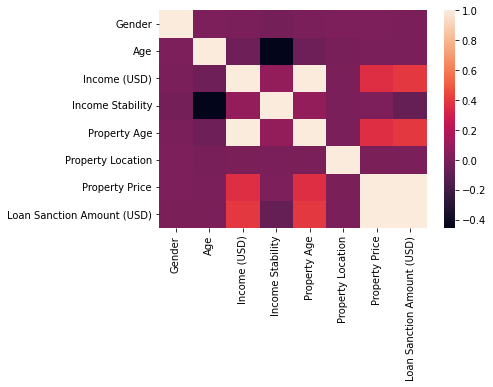

In [13]:
import seaborn as sns

normalized_data=normalize_data(df.copy())
sns.heatmap(normalized_data.corr())


# Apply Machine learning model

# Train - Test split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [15]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()     # Columns name
    columns.remove('Loan Sanction Amount (USD)') 
    X = df[columns]# Todo: Select features
    y = df['Loan Sanction Amount (USD)']# Todo: Select label
    return X, y

X, y = prepare_X_y(normalized_data)

In [16]:
def split_train_test(X,y,train_size=0.7):
    trainX, testX, trainY, testY = train_test_split(X, y, train_size=train_size, random_state=100)
    print('Training: ' + str(trainX.shape))
    print('Test: ' + str(testX.shape))
    return trainX, testX, trainY, testY

trainX, testX, trainY, testY = split_train_test(X, y)

Training: (33075, 7)
Test: (14176, 7)


## Basic Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)   
    model.fit(trainX, trainY) 

    return model

In [19]:
model = build_linear_model(trainX, trainY)

pred = model.predict(trainX)   
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=pred, y_true=trainY))
pred = model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=pred, y_true=testY))

print('Coeficient:\n',model.coef_) # print coefficient
print()
print('Intercept: ',model.intercept_) # print intercept


Mean absolute error of linear model on train set:  135.08962336778595
Mean absolute error of linear model on test set:  166.64253477647725
Coeficient:
 [-2.67570973e+02 -7.89627585e+01  5.69042982e-01 -1.11514881e+04
  4.54644495e-01 -5.75548643e+01  3.36087452e-01]

Intercept:  11920.35422170243


# Ridge, Lasso,  ElasticNet

## Ridge
Ridge là một mô hình học máy sử dụng để giải quyết bài toán hồi quy tuyến tính. Mô hình này giúp giảm giá trị các hệ số để tránh overfitting bằng cách thêm một thành phần bình phương của tổng giá trị các hệ số vào hàm mất mát.

In [20]:
from sklearn.linear_model import Ridge

In [23]:
# Khoi tao doi tuong Ridge
ridge_model = Ridge(tol=0.001)

In [26]:
ridge_model.fit(trainX, trainY)

ridge_pred = ridge_model.predict(trainX)
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=ridge_pred, y_true=trainY))
ridge_pred = ridge_model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=ridge_pred, y_true=testY))

print('Coeficient:\n',ridge_model.coef_) # print coefficient
print()
print('Intercept: ',ridge_model.intercept_) # print intercept

Mean absolute error of linear model on train set:  135.34213421251914
Mean absolute error of linear model on test set:  166.93242662474404
Coeficient:
 [-2.67444082e+02 -7.88778941e+01  5.71955377e-01 -1.11407866e+04
  4.51590677e-01 -5.75269812e+01  3.36088177e-01]

Intercept:  11907.373663982551


## Lasso
Tương tự như Ridge, Lasso giúp giảm số lượng các hệ số không cần thiết trong mô hình bằng cách thêm một thành phần bình phương của tổng giá trị tuyệt đối của các hệ số vào hàm mất mát. Tuy nhiên, phương pháp regularization của Lasso sử dụng L1 regularization, trong khi đó Ridge sử dụng L2 regularization. Phương pháp này có thể giúp giữ lại một số đặc trưng quan trọng trong mô hình hơn so với Ridge. 

In [27]:
from sklearn.linear_model import Lasso

In [29]:
# Khoi tao doi tuong Lasso

#lasso_model = Lasso(alpha=1.0, fit_intercept=True,precompute=False, copy_X=True, max_iter=1000,
                    #tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
''' Khi dùng các tham số trên cho mô hình Lasso thì gặp cảnh báo: ConvergenceWarning: Objective did not 
converge. You might want to increase the number of iterations, check the scale of the features or 
consider increasing regularisation. Duality gap: 2.777e+10, tolerance: 3.502e+09 
model = cd_fast.enet_coordinate_descent('''
# Để sửa lỗi em tăng giá trị max_iter=5000

lasso_model = Lasso(max_iter=5000,tol=0.0001)

In [30]:
lasso_model.fit(trainX, trainY)

lasso_pred = lasso_model.predict(trainX)
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=lasso_pred, y_true=trainY))
lasso_pred = ridge_model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=lasso_pred, y_true=testY))

print('Coeficient:\n',lasso_model.coef_) # print coefficient
print()
print('Intercept: ',lasso_model.intercept_) # print intercept

Mean absolute error of linear model on train set:  135.36685988051767
Mean absolute error of linear model on test set:  166.93242662474404
Coeficient:
 [-2.63552727e+02 -7.88296187e+01  8.18293319e-01 -1.11352762e+04
  2.05197016e-01 -5.60239750e+01  3.36088423e-01]

Intercept:  11897.114800838004


d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.734e+10, tolerance: 3.502e+09
  model = cd_fast.enet_coordinate_descent(


## ElasticNet
ElasticNet là sự kết hợp của mô hình Lasso và Ridge, kết hợp cả regularization L1 và L2.

In [31]:
from sklearn.linear_model import ElasticNet

In [35]:
# alpha = 1
elasticnet_model = ElasticNet(alpha = 1, max_iter=1000, tol=0.0001)
elasticnet_model.fit(trainX, trainY)

elasticnet_pred = elasticnet_model.predict(trainX)
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=trainY))
elasticnet_pred = elasticnet_model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=testY))

print('Coeficient:\n',elasticnet_model.coef_) # print coefficient
print()
print('Intercept: ',elasticnet_model.intercept_) # print intercept

Mean absolute error of linear model on train set:  1722.37030770418
Mean absolute error of linear model on test set:  1795.2158561123451
Coeficient:
 [-6.92376738e+01 -4.30503799e-01  9.40449709e-01 -1.24599945e+03
 -4.76351273e-02 -2.06182038e+01  3.36760985e-01]

Intercept:  -145.4176335694865


d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+11, tolerance: 3.502e+09
  model = cd_fast.enet_coordinate_descent(


In [36]:
# alpha = 0.01

elasticnet_model = ElasticNet(alpha = 0.01, max_iter=1000, tol=0.0001)
elasticnet_model.fit(trainX, trainY)

elasticnet_pred = elasticnet_model.predict(trainX)
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=trainY))
elasticnet_pred = elasticnet_model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=testY))

print('Coeficient:\n',elasticnet_model.coef_) # print coefficient
print()
print('Intercept: ',elasticnet_model.intercept_) # print intercept

Mean absolute error of linear model on train set:  236.27931304684557
Mean absolute error of linear model on test set:  271.01718528371424
Coeficient:
 [-2.57641280e+02 -7.24548101e+01  8.56409713e-01 -1.03308364e+04
  1.56436238e-01 -5.53967181e+01  3.36143036e-01]

Intercept:  10924.804789510126


d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+10, tolerance: 3.502e+09
  model = cd_fast.enet_coordinate_descent(


In [37]:
# alpha = 0.0001
elasticnet_model = ElasticNet(alpha = 0.0001, max_iter=1000, tol=0.0001)
elasticnet_model.fit(trainX, trainY)

elasticnet_pred = elasticnet_model.predict(trainX)
print('Mean absolute error of linear model on train set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=trainY))
elasticnet_pred = elasticnet_model.predict(testX)   
print('Mean absolute error of linear model on test set: ', mean_absolute_error(y_pred=elasticnet_pred, y_true=testY))

print('Coeficient:\n',elasticnet_model.coef_) # print coefficient
print()
print('Intercept: ',elasticnet_model.intercept_) # print intercept

Mean absolute error of linear model on train set:  135.34322026551803
Mean absolute error of linear model on test set:  166.9221393032871
Coeficient:
 [-2.67521108e+02 -7.88916387e+01  8.48713147e-01 -1.11425510e+04
  1.74870136e-01 -5.75399278e+01  3.36087867e-01]

Intercept:  11909.52727940194


d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.090e+10, tolerance: 3.502e+09
  model = cd_fast.enet_coordinate_descent(


# Polynomial transform 
When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)
    return poly_model

poly_model = build_pipeline(trainX, trainY)

poly_pred = poly_model.predict(trainX)

print('Mean absolute error of linear model (with poly transform) on train set: ', mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print('Mean absolute error of linear model (with poly transform) on test set: ', mean_absolute_error(y_pred=poly_pred, y_true=testY))

Mean absolute error of linear model (with poly transform) on train set:  120.89579266983651
Mean absolute error of linear model (with poly transform) on test set:  152.7897816215306


Trong hồi quy tuyến tính, Polynomial Transform là một kỹ thuật được sử dụng để biến đổi các biến đầu vào ban đầu thành các biến đầu vào mới bằng cách thêm các mũ của chúng. Việc biến đổi này có thể giúp cho mô hình có khả năng khớp với dữ liệu tốt hơn. Đồng thời, Polynomial Transform cũng có thể giúp loại bỏ hiện tượng tuyến tính hoá trong dữ liệu.
Tuy nhiên, nếu ta chọn giá trị n quá lớn dẫn đến mô hình quá khớp với dữ liệu và có thể gây ra hiện tượng overfitting. Bên cạnh đó, có thể làm cho mô hình trở nên rất phức tạp và khó kiểm soát.